**Question 1**

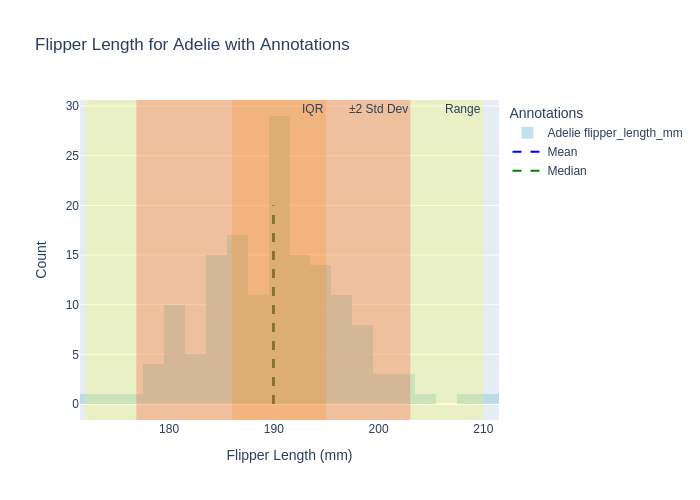

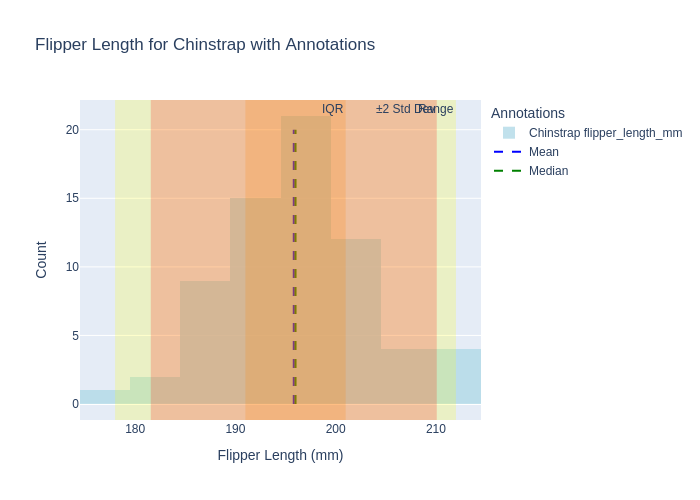

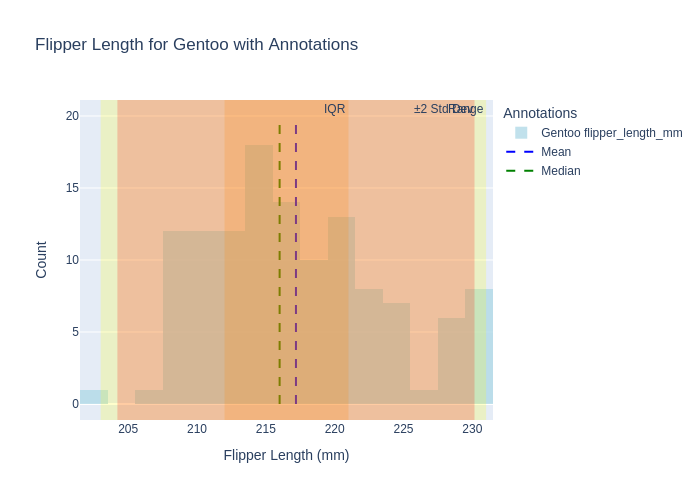

In [18]:
import pandas as pd
import plotly.graph_objects as go

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to plot separate histograms for each species
def plot_flipper_histograms_separate(df):
    species_list = df['species'].unique()
    figures = []
    
    for species in species_list:
        species_data = df[df['species'] == species]['flipper_length_mm']
        
        # Calculate statistics
        mean_flipper = species_data.mean()
        median_flipper = species_data.median()
        min_flipper = species_data.min()
        max_flipper = species_data.max()
        q1 = species_data.quantile(0.25)
        q3 = species_data.quantile(0.75)
        std_flipper = species_data.std()
        lower_bound = mean_flipper - 2 * std_flipper
        upper_bound = mean_flipper + 2 * std_flipper
        
        # Create histogram for species
        fig = go.Figure()
        
        fig.add_trace(go.Histogram(
            x=species_data,
            name=f'{species} flipper_length_mm',
            opacity=0.75,
            marker=dict(color='lightblue'),
            legendgroup=species
        ))
        
        # Add mean and median lines and include them in the legend
        fig.add_trace(go.Scatter(
            x=[mean_flipper, mean_flipper],
            y=[0, 20],  # Adjust y range as necessary
            mode='lines',
            name='Mean',
            line=dict(color='blue', dash='dash'),
            legendgroup=species
        ))
        
        fig.add_trace(go.Scatter(
            x=[median_flipper, median_flipper],
            y=[0, 20],  # Adjust y range as necessary
            mode='lines',
            name='Median',
            line=dict(color='green', dash='dash'),
            legendgroup=species
        ))
        
        # Add range, IQR, and 2 std deviation range as rectangles
        fig.add_vrect(x0=min_flipper, x1=max_flipper, line_width=0, fillcolor="yellow", opacity=0.2, annotation_text='Range')
        fig.add_vrect(x0=q1, x1=q3, line_width=0, fillcolor="orange", opacity=0.2, annotation_text='IQR')
        fig.add_vrect(x0=lower_bound, x1=upper_bound, line_width=0, fillcolor="red", opacity=0.2, annotation_text='±2 Std Dev')
        
        # Update layout with legend and titles
        fig.update_layout(
            title=f'Flipper Length for {species} with Annotations',
            xaxis_title='Flipper Length (mm)',
            yaxis_title='Count',
            legend_title='Annotations',
            barmode='overlay',
            showlegend=True
        )
        
        figures.append(fig)
    
    return figures

# Create the histograms
figures = plot_flipper_histograms_separate(penguins)
figures[0].show(renderer="png")
figures[1].show(renderer="png")
figures[2].show(renderer="png")

**Question 2**

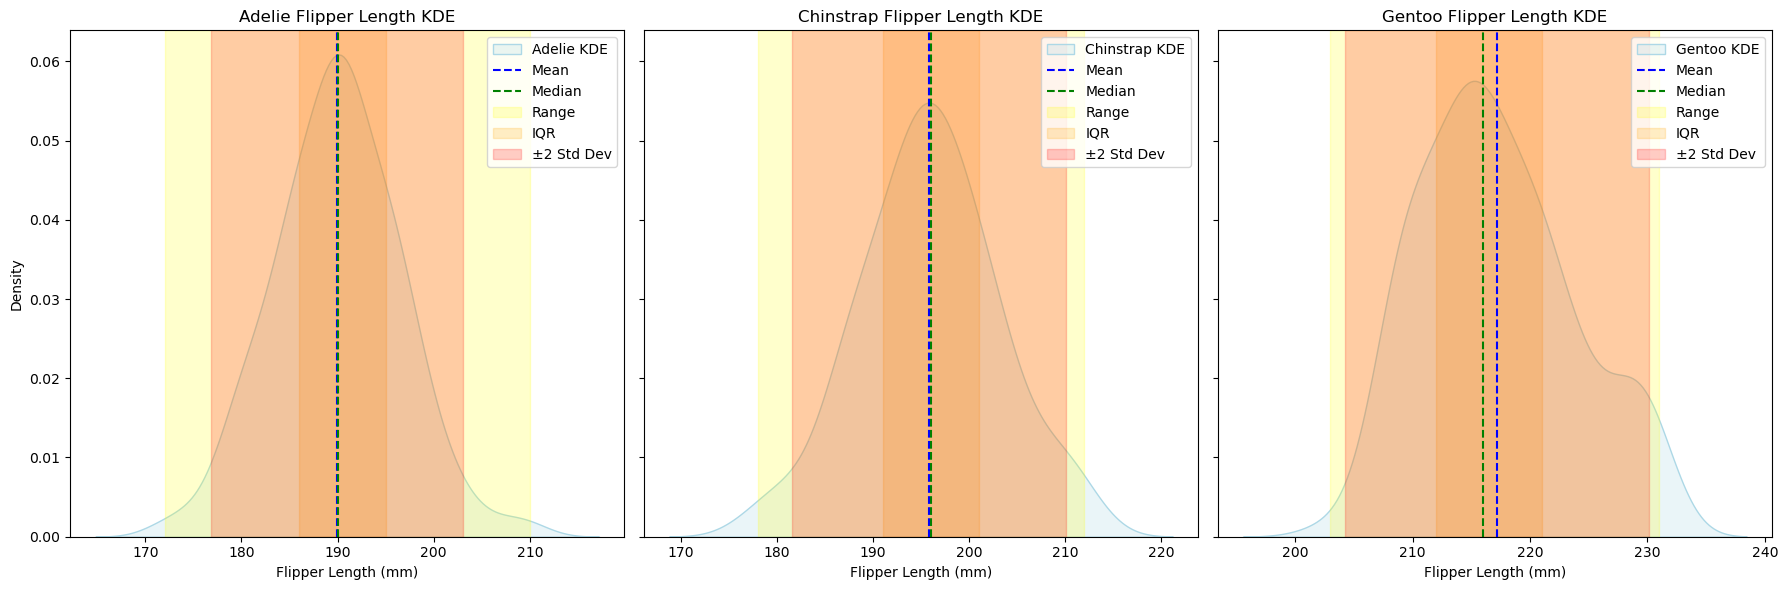

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the penguins dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values in flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Function to create KDE plots with annotations for each species
def plot_kde_flipper_length(df):
    species_list = df['species'].unique()
    num_species = len(species_list)
    
    # Create subplots with 3 columns (row of 3 plots)
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
    
    for i, species in enumerate(species_list):
        species_data = df[df['species'] == species]['flipper_length_mm']
        
        # Calculate statistics
        mean_flipper = species_data.mean()
        median_flipper = species_data.median()
        min_flipper = species_data.min()
        max_flipper = species_data.max()
        q1 = species_data.quantile(0.25)
        q3 = species_data.quantile(0.75)
        std_flipper = species_data.std()
        lower_bound = mean_flipper - 2 * std_flipper
        upper_bound = mean_flipper + 2 * std_flipper
        
        # Create KDE plot for the current species
        ax = axes[i]
        sns.kdeplot(species_data, ax=ax, fill=True, label=f'{species} KDE', color="lightblue")
        
        # Add vertical lines for mean and median
        ax.axvline(mean_flipper, color='blue', linestyle='--', label='Mean')
        ax.axvline(median_flipper, color='green', linestyle='--', label='Median')
        
        # Add shaded areas for range, IQR, and ±2 std deviation range
        ax.axvspan(min_flipper, max_flipper, alpha=0.2, color='yellow', label='Range')
        ax.axvspan(q1, q3, alpha=0.2, color='orange', label='IQR')
        ax.axvspan(lower_bound, upper_bound, alpha=0.2, color='red', label='±2 Std Dev')
        
        # Set title and labels
        ax.set_title(f'{species} Flipper Length KDE')
        ax.set_xlabel('Flipper Length (mm)')
        ax.legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.savefig('penguins_kde_plots.png', format='png', dpi=400)
    plt.show()

# Create the KDE plots with the desired layout and annotations
plot_kde_flipper_length(penguins)

**Question 3**

Kernel density estimators (KDEs) may be the most ideal visualisation method by giving an approximation of the empirical distribution of data as a smooth curve function. Unlike histograms which would give a binned representation of the data, KDEs offer a more fluid and visually appealing estimate of the distribution. Graphs which use kernel density estimation, notably violin plots, also allow comparison of distributions across different categories and can display multi-modal distributions, which a box plot would be unable to visualise. For that matter, KDEs may be more informative than the summary statistics shown by box plots. However, it is still important to keep in mind that the choice of kernel bandwidth can influence the appearance of KDEs, and so any data visualisation done through KDEs should always take into account the arbitrary nature of the smoothing parameter.  

**Question 4**

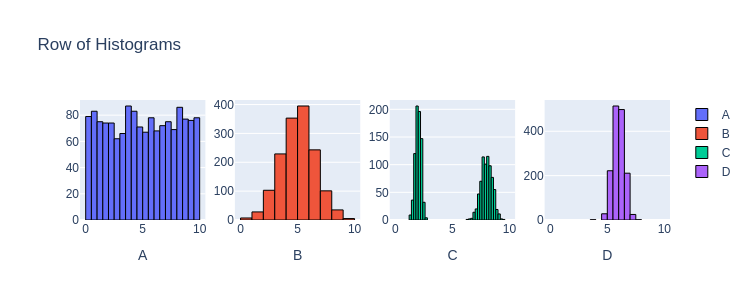

In [2]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Which datasets have similar means and similar variances? **A and C**

Which datasets have similar means but quite different variances? **A and B, or B and C**

Which datasets have similar variances but quite different means? **B and D**

Which datasets have quite different means and quite different variances? **A and D, or C and D**

**ChatBot session summary:**

Summary of Interactions:
1. Visualization Methods Descriptions:

You provided clear descriptions of three types of data visualizations:
Box Plot: Represents the statistical spread of a data distribution around its median, with whiskers extending up to 1.5 times the interquartile range.
Histogram: Displays data using bars whose height represents the frequency of data points within intervals (bins).
Kernel Density Estimator (KDE): A non-parametric estimation of the probability density function (PDF) that visualizes a continuous distribution with a smooth curve, without using discrete bins like a histogram.
2. Visualization Method Pros and Cons:

I provided a detailed comparison of the pros and cons for each visualization method:
Box Plot: Strengths in summarizing data distribution with focus on medians and quartiles, but lacks distribution shape information.
Histogram: Excellent for showing distribution shape, but sensitive to bin size.
KDE: Smooth and flexible representation of data distribution, but sensitive to bandwidth choice and harder to interpret.
3. Explanation of Parameters vs. Statistics:

We discussed the distinction between parameters and statistics:
Parameters: Summarize entire populations and are often unknown, typically represented with Greek letters (e.g., μ for mean).
Statistics: Summarize a sample from a population, providing estimates of parameters, usually represented with Latin letters (e.g., 
𝑥
ˉ
x
ˉ
  for sample mean).
I provided examples to illustrate the difference between the two concepts.
4. Code and Visualizations Using Python:

I helped you generate histograms and KDE plots for the penguins dataset:
You asked to highlight statistics such as mean, median, interquartile range, and range.
Initially, we created separate histograms for each species using Plotly, later using Seaborn’s KDE plots to visualize the data.
We annotated the plots with lines and shaded areas to represent the key statistics (mean, median, range, IQR, and ±2 standard deviations).
We discussed how to organize the plots in a row of three using Matplotlib's plt.subplots(), and how to save the plots as PNG files with plt.savefig().

**ChatBot Transcript log:** https://chatgpt.com/share/66f5d0ff-ceb8-8012-846e-0135ea70e206

**Question 5**

Mean and median are both measures of central tendency in a dataset. Mean is the sum of all values in a dataset divided by the number of values in that dataset, whereas median is the middlemost value in the set. Since the mean takes into account every single value in a dataset, it will be affected by extreme values shown by skewness. In contrast, the median only considers the middle value of the dataset and is less affected by outliers.

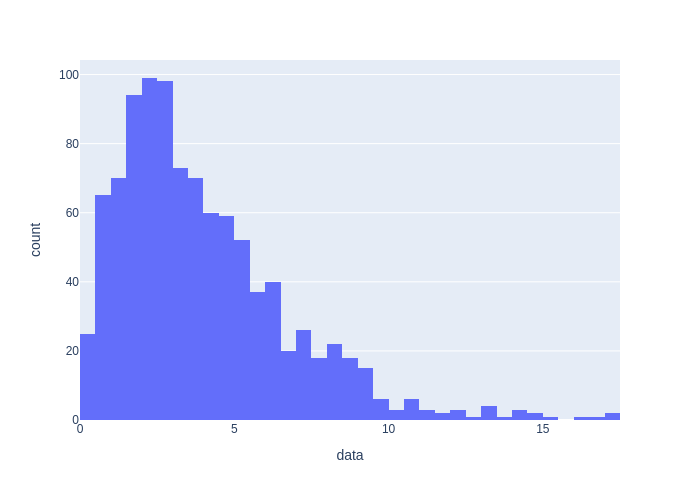

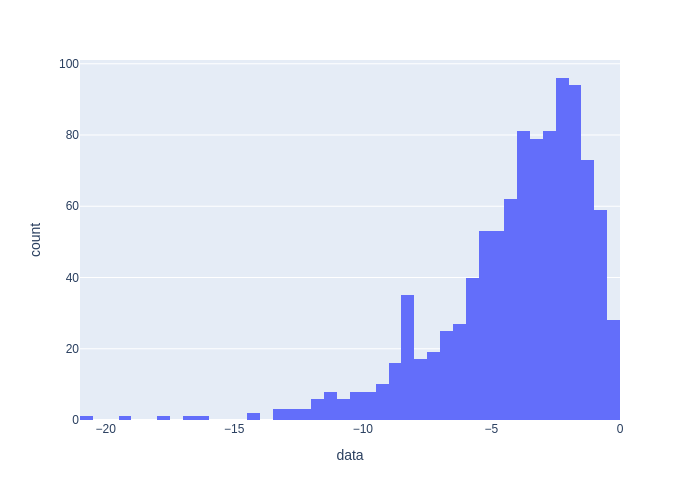

In [33]:
import plotly.express as px
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig1.show(renderer="png")
fig2.show(renderer="png")

In the case of positive skewness, the mean is pulled towards the higher values which cause the distribution to be skewed to the right, leading to a higher value for the mean than for the median (mean is to the right of the median).

In [26]:
np.quantile(sample1, [0.5])

array([3.28114529])

In [28]:
sample1.mean()

4.058310198470885

In the case of negative skewness, the mean is pulled towards the lower values which cause the distribution to be skewed to the left, leading to a lower value for the mean than for the median (mean is to the left of the median). 

In [32]:
np.quantile(sample2, [0.5])

array([-3.40421397])

In [29]:
sample2.mean()

-4.059393393246322

ChatBot session summary for qu5:

Here's a concise summary of our interactions regarding your homework:

Skewness and Relationship between Mean and Median:

We discussed how the mean and median relate to right and left skewness. For right-skewed distributions, the mean is typically greater than the median, as the longer right tail pulls the mean higher. In left-skewed distributions, the mean is less than the median, because the left tail pulls the mean down.
The logic behind this is that the mean is sensitive to extreme values (outliers), while the median, being the middle value, is more robust and less affected by the tails of the distribution.
Code Explanation:

You shared a code snippet that uses scipy.stats to generate random samples from a gamma distribution.
The first sample (sample1) represents a right-skewed distribution, and a histogram is created to visualize it. Additionally, we computed the mean and median for this sample.
The second sample (sample2) is a left-skewed distribution, created by negating the values of a gamma distribution.
The purpose of the code is to explore and visualize skewness through random sampling and statistical measures.
This summary captures our discussion on the statistical concepts of skewness and the provided Python code related to your homework assignment.

ChatBot transcript log: https://chatgpt.com/share/66f5fa08-bc2c-8012-b987-cba072bb2dce

**Question 6**

The dataset below relates to every match of the 2021-2022 season of the English Premier League (EPL), played between 20 teams. My analysis of the data will be as follows:

1. Use summary statistics to draw general conclusions about the league system and key points of interest regarding match results.
2. Assess missingness in the data, if any.
3. Analyse the statistical trend which differentiated successful clubs from midtable clubs and clubs who were relegated or close to being relegated. 
4. The difference between the distributions of goals scored by the home team and goals scored by the away team.

In [60]:
import pandas as pd
url = "https://raw.githubusercontent.com/Kenshin1504/STA130/main/2021-2022.csv"
df = pd.read_csv(url)
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,13/08/2021,20:00,Brentford,Arsenal,2,0,H,1,0,...,1.62,0.50,1.75,2.05,1.81,2.13,2.05,2.17,1.80,2.09
1,E0,14/08/2021,12:30,Man United,Leeds,5,1,H,1,0,...,2.25,-1.00,2.05,1.75,2.17,1.77,2.19,1.93,2.10,1.79
2,E0,14/08/2021,15:00,Burnley,Brighton,1,2,A,1,0,...,1.62,0.25,1.79,2.15,1.81,2.14,1.82,2.19,1.79,2.12
3,E0,14/08/2021,15:00,Chelsea,Crystal Palace,3,0,H,2,0,...,1.94,-1.50,2.05,1.75,2.12,1.81,2.16,1.93,2.06,1.82
4,E0,14/08/2021,15:00,Everton,Southampton,3,1,H,0,1,...,1.67,-0.50,2.05,1.88,2.05,1.88,2.08,1.90,2.03,1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,E0,22/05/2022,16:00,Crystal Palace,Man United,1,0,H,1,0,...,2.04,0.25,1.68,2.15,1.74,2.23,1.88,2.25,1.74,2.16
376,E0,22/05/2022,16:00,Leicester,Southampton,4,1,H,0,0,...,2.63,-0.75,1.83,2.07,1.88,2.03,1.94,2.26,1.87,2.01
377,E0,22/05/2022,16:00,Liverpool,Wolves,3,1,H,1,1,...,3.28,-2.50,2.02,1.77,2.06,1.83,2.19,1.99,2.07,1.80
378,E0,22/05/2022,16:00,Man City,Aston Villa,3,2,H,0,1,...,3.36,-2.25,2.06,1.84,2.05,1.86,2.09,2.03,2.01,1.87


**Key summary statistics:**
1. **count** - 380 matches are played in the EPL each season, divided into 38 gameweeks. All teams play in each gameweek, meaning 10 games per gameweek are played. Each team plays an opponent twice, once at home and once away.
2. **mean** - Comparing Full Time Home Team Goals (FTHG) and Full-Time Away Team Goals (FTAG), we can observe that the home team on average scored 0.2 goals more than the away team. This suggests there was a slight advantage for the home team in every match. 
3. **std** - Unlike the standard deviation for goals (FTHG and FTAG), the standard deviation for home team shots (HS) and away team shots (AS) was markedly higher, exceeding 5. This suggests that the number of shots made by each team in any given match tended to be less predictable and subject to wider variations, compared to the number of goals scored.

In [61]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,379.000000,379.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.513158,1.305263,0.681579,0.589474,13.847368,11.736842,4.678947,4.142105,10.055263,10.157895,...,2.070053,-0.248026,1.933193,1.966069,1.951105,1.975447,2.021211,2.054711,1.926868,1.958500
std,1.326545,1.258836,0.832187,0.808853,5.661784,5.348460,2.600402,2.589978,3.444180,3.718501,...,0.404372,0.950713,0.104168,0.099308,0.105294,0.106912,0.113965,0.111772,0.093221,0.094822
min,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,...,1.480000,-2.750000,1.650000,1.700000,1.660000,1.720000,1.800000,1.820000,1.700000,1.750000
25%,1.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,7.000000,...,1.780000,-0.750000,1.855000,1.900000,1.870000,1.907500,1.940000,1.960000,1.850000,1.890000
50%,1.000000,1.000000,0.000000,0.000000,13.500000,11.000000,4.000000,4.000000,10.000000,10.000000,...,1.990000,-0.250000,1.940000,1.970000,1.950000,1.970000,2.010000,2.050000,1.925000,1.955000
75%,2.000000,2.000000,1.000000,1.000000,17.000000,15.000000,6.000000,6.000000,12.000000,12.250000,...,2.230000,0.250000,2.020000,2.050000,2.020000,2.050000,2.100000,2.140000,2.000000,2.040000
max,7.000000,6.000000,4.000000,4.000000,31.000000,31.000000,15.000000,14.000000,22.000000,25.000000,...,3.780000,2.500000,2.150000,2.200000,2.260000,2.380000,2.850000,2.520000,2.150000,2.230000


**Missing values**

There were 5 matches for which missing values exist:

In [72]:
missing_locations = df.isnull()
df[missing_locations.any(axis=1)]

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
166,E0,19/12/2021,14:00,Newcastle,Man City,0,4,A,0,2,...,3.14,2.50,1.75,2.05,1.81,2.09,1.93,2.13,1.81,2.07
327,E0,24/04/2022,14:00,Burnley,Wolves,1,0,H,0,0,...,1.60,-0.25,NaN,NaN,2.18,1.79,2.20,1.92,2.15,1.76
337,E0,30/04/2022,17:30,Leeds,Man City,0,4,A,0,1,...,2.56,1.50,1.96,1.94,1.98,1.94,2.05,1.98,1.98,1.90
338,E0,01/05/2022,14:00,Everton,Chelsea,1,0,H,0,0,...,1.85,0.75,1.94,1.96,1.98,1.94,2.09,2.00,1.96,1.92
339,E0,01/05/2022,14:00,Tottenham,Leicester,3,1,H,1,0,...,2.42,-1.50,2.02,1.88,2.04,1.89,2.06,2.03,2.00,1.88


**Analysis of season performance based on goal difference**

The first bar chart below shows the goal difference (total goals scored at home and away less total goals conceded at home and away) of each team at the end of the season. The second bar chart shows the points tally of each team at the end of the season. Notice that 2 of the 3 relegated teams (Norwich and Watford) had the worst goal differences in the league, while the top 5 (Manchester City, Liverpool, Tottenham, Chelsea and Arsenal) had the best goal differences. 

**Presence of outliers**

An interesting point to note is that goal difference is not a perfect indicator of the final league position of a club. Leeds United had a considerably worse goal difference than Burnley, and yet the points tally shows that Burnley were the ones relegated rather than Leeds. One way to explain this was that Leeds often lost matches with a heavy scoreline, and all of its victories were closely contested (winning by a single goal). 

It would seem that Manchester United also overperformed on the points tally, ending the season at 6th despite a goal difference of 0, which would have placed them 9th on the table based on goal difference. 

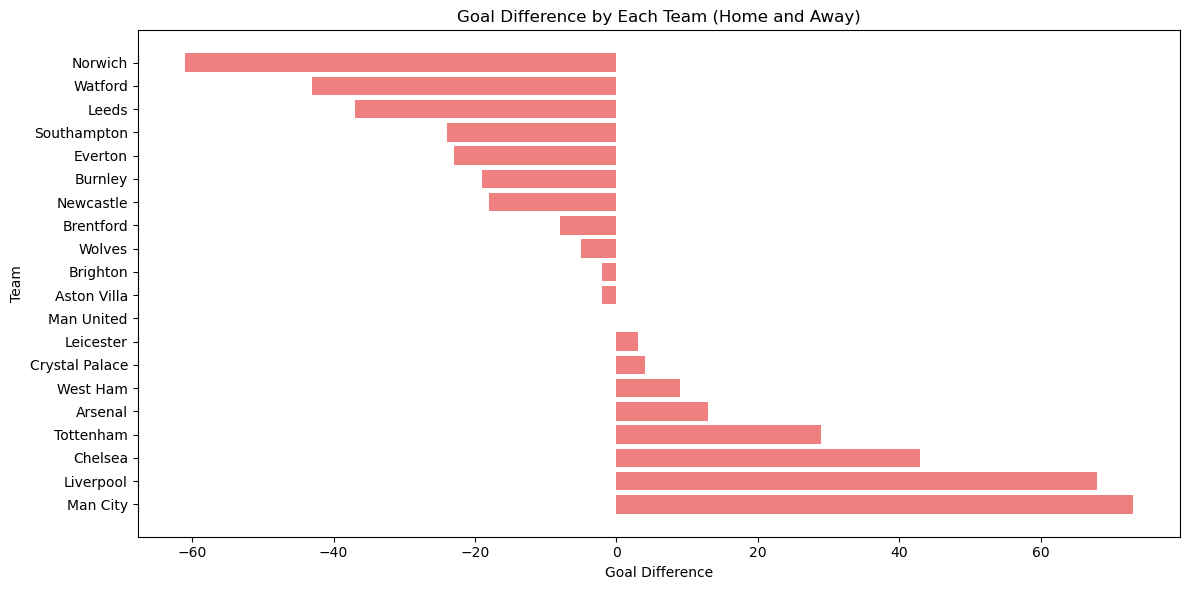

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
url = "https://raw.githubusercontent.com/Kenshin1504/STA130/main/2021-2022.csv"
data = pd.read_csv(url)

# Step 2: Calculate total goals scored and conceded for each team
home_goals = data.groupby('HomeTeam')['FTHG'].sum().reset_index()
away_goals = data.groupby('AwayTeam')['FTAG'].sum().reset_index()

# Calculate goals conceded for home and away matches
home_goals_conceded = data.groupby('HomeTeam')['FTAG'].sum().reset_index()
away_goals_conceded = data.groupby('AwayTeam')['FTHG'].sum().reset_index()

# Rename columns for clarity
home_goals.columns = ['Team', 'Goals Scored']
away_goals.columns = ['Team', 'Goals Scored']
home_goals_conceded.columns = ['Team', 'Goals Conceded']
away_goals_conceded.columns = ['Team', 'Goals Conceded']

# Combine the goals scored
total_goals_scored = pd.concat([home_goals, away_goals]).groupby('Team')['Goals Scored'].sum().reset_index()

# Combine the goals conceded
total_goals_conceded = pd.concat([home_goals_conceded, away_goals_conceded]).groupby('Team')['Goals Conceded'].sum().reset_index()

# Merge the two DataFrames to get both goals scored and conceded
goal_stats = pd.merge(total_goals_scored, total_goals_conceded, on='Team')

# Calculate goal difference
goal_stats['Goal Difference'] = goal_stats['Goals Scored'] - goal_stats['Goals Conceded']

# Sort the DataFrame by Goal Difference in descending order
goal_stats = goal_stats.sort_values(by='Goal Difference', ascending=False)

# Step 3: Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(goal_stats['Team'], goal_stats['Goal Difference'], color='lightcoral')  # Use light coral color
plt.xlabel('Goal Difference')
plt.ylabel('Team')
plt.title('Goal Difference by Each Team (Home and Away)')
plt.tight_layout()
plt.savefig('goal_difference_chart.png', format='png', dpi=300)
plt.show()

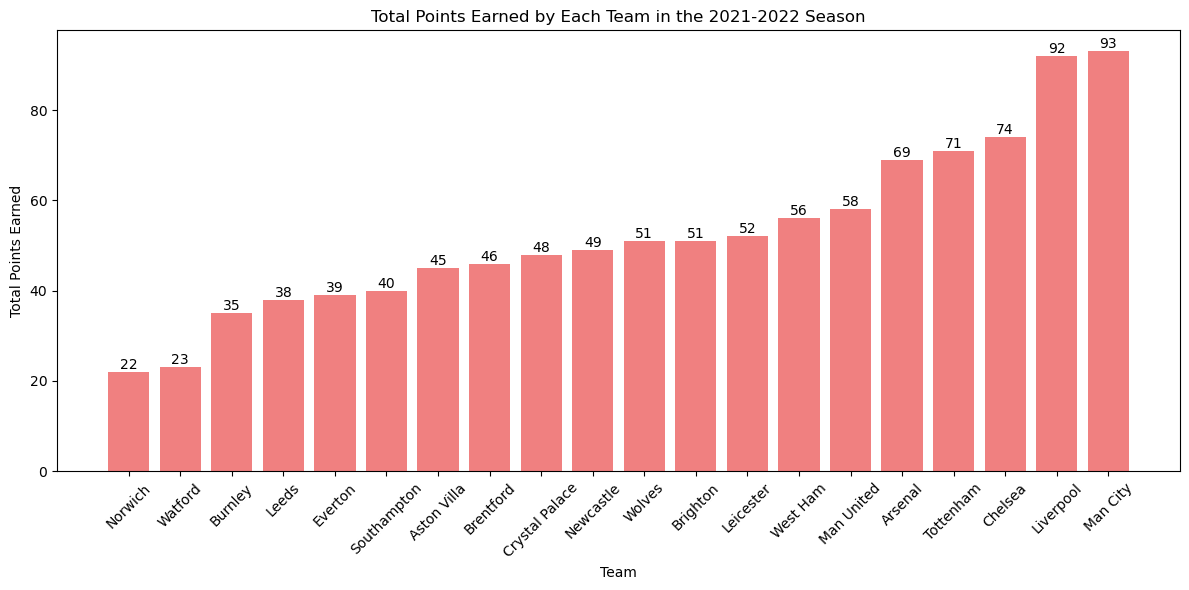

In [81]:
# Step 2: Initialize points dictionary
points = {}

# Step 3: Calculate points for each match
for index, row in data.iterrows():
    home_team = row['HomeTeam']
    away_team = row['AwayTeam']
    home_goals = row['FTHG']
    away_goals = row['FTAG']
    
    # Initialize points if not already done
    if home_team not in points:
        points[home_team] = 0
    if away_team not in points:
        points[away_team] = 0
    
    # Determine points based on the match result
    if home_goals > away_goals:  # Home team wins
        points[home_team] += 3
    elif home_goals < away_goals:  # Away team wins
        points[away_team] += 3
    else:  # Draw
        points[home_team] += 1
        points[away_team] += 1

# Step 4: Create a DataFrame from points dictionary
points_df = pd.DataFrame(list(points.items()), columns=['Team', 'Points'])

# Step 5: Sort the DataFrame by Points in descending order
points_df = points_df.sort_values(by='Points', ascending=True)  # Sort in ascending order for left to right

# Step 6: Create the vertical bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(points_df['Team'], points_df['Points'], color='lightcoral')  # Change color to lightcoral

# Add data labels on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')  # Add points above the bars

plt.ylabel('Total Points Earned')
plt.xlabel('Team')
plt.title('Total Points Earned by Each Team in the 2021-2022 Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_points_2021_2022_season.png', format='png', dpi=300)
plt.show()

**Kernel density estimation (KDE) of goals scored per match at home and away**

Teams scored on average more goals when playing at home compared to playing as the away team, but this difference was not considerable. The home team, however, had a higher chance on average of scoring an unusually large number goals than the away team. This is shown by the tail of the distribution for goals scored at home reaching 4, compared to 3 for the away team. 

Possible explanations to explain why the home team might have had an advantage would be that the home team was more accustomed to the pitch conditions of the stadium where the match was played. Stadiums generally also host a higher proportion of home fans compared to fans of the away team. Given that the fanbase of football clubs in England is largely determined by their location such that people support their local clubs, it is natural for clubs to allocate more tickets to local supporters in a bid to increase their own players' morale during games and try to alienate the away team. 

Yet, the data on goals scored at home and away shows this factor is not as significant, perhaps due to the increasing importance of tactical discipline as one of the determining factors to win games, whether it be at home or away.

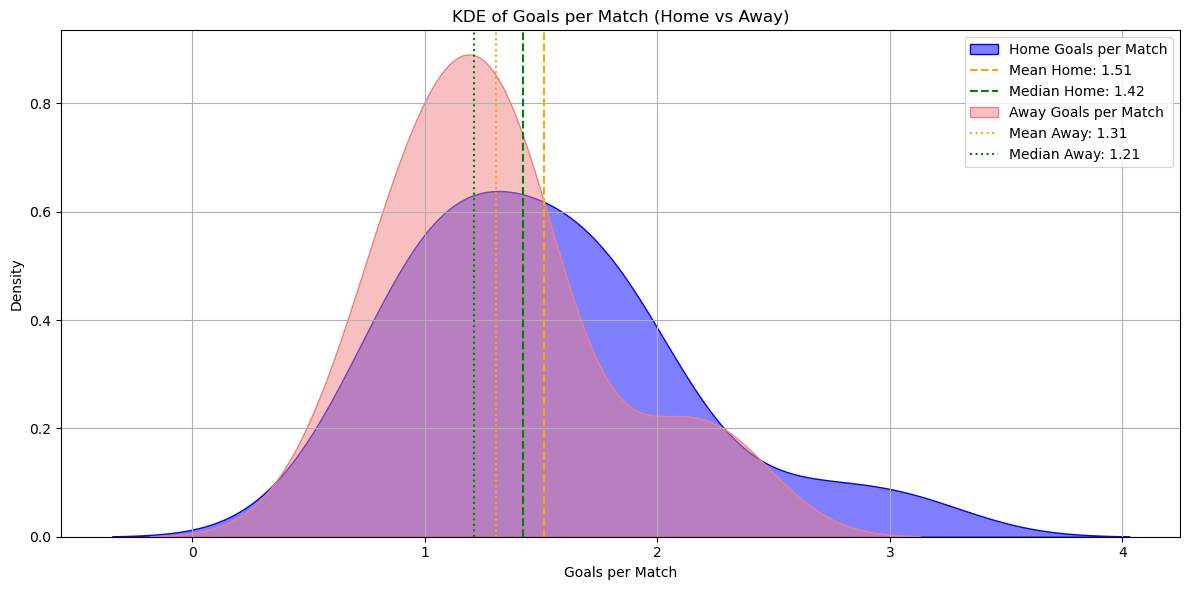

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Calculate total goals and matches played at home
home_goals = data.groupby('HomeTeam')['FTHG'].sum().reset_index()
home_matches = data.groupby('HomeTeam')['FTHG'].count().reset_index()

# Step 2: Calculate total goals and matches played away
away_goals = data.groupby('AwayTeam')['FTAG'].sum().reset_index()
away_matches = data.groupby('AwayTeam')['FTAG'].count().reset_index()

# Step 3: Calculate goals per match for home and away
home_goals['Matches'] = home_matches['FTHG']
home_goals['Goals per Match'] = home_goals['FTHG'] / home_goals['Matches']

away_goals['Matches'] = away_matches['FTAG']
away_goals['Goals per Match'] = away_goals['FTAG'] / away_goals['Matches']

# Step 4: Create the KDE plot
plt.figure(figsize=(12, 6))

# KDE for goals per match at home
sns.kdeplot(home_goals['Goals per Match'], color='blue', fill=True, alpha=0.5, label='Home Goals per Match')
plt.axvline(home_goals['Goals per Match'].mean(), color='orange', linestyle='--', label=f'Mean Home: {home_goals["Goals per Match"].mean():.2f}')
plt.axvline(home_goals['Goals per Match'].median(), color='green', linestyle='--', label=f'Median Home: {home_goals["Goals per Match"].median():.2f}')

# KDE for goals per match away
sns.kdeplot(away_goals['Goals per Match'], color='lightcoral', fill=True, alpha=0.5, label='Away Goals per Match')
plt.axvline(away_goals['Goals per Match'].mean(), color='orange', linestyle=':', label=f'Mean Away: {away_goals["Goals per Match"].mean():.2f}')
plt.axvline(away_goals['Goals per Match'].median(), color='green', linestyle=':', label=f'Median Away: {away_goals["Goals per Match"].median():.2f}')

# Step 5: Customize the plot
plt.title('KDE of Goals per Match (Home vs Away)')
plt.xlabel('Goals per Match')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.tight_layout()

# Show the plot
plt.savefig('goals_per_match_kde.png', format='png', dpi=300) 
plt.show()

ChatBot session summary:

Summary of Interactions
Dataset Exploration:

You provided a dataset from a GitHub repository for analysis, specifically focusing on football matches from the 2021-2022 season.
Goal Analysis:

You requested calculations for the total number of goals scored at home and away for each team, along with a bar chart visualization.
Subsequently, you asked to create a vertical bar chart showing the points earned by each team based on match outcomes (wins, draws, and losses).
Data Visualization Adjustments:

You wanted to adjust the bar chart to display teams with the most points on the left and the least on the right, with added data labels indicating the number of points.
You also requested to render the visualizations as PNG files.
Goal Difference Analysis:

You asked to create a horizontal bar chart to show the goal difference for each team.
Later, you inquired about rendering that bar chart as a PNG file as well.
KDE and Violin Plots:

We discussed the suitability of using violin plots to analyze scoring patterns, focusing on Manchester City’s performance at home vs. away.
You then requested a Kernel Density Estimate (KDE) plot showing mean, median, standard deviation, and interquartile range of total home goals scored.
Afterward, you asked to create a similar KDE for total away goals scored and to overlap it with the home goals KDE.
Goals Per Match Analysis:

You requested the KDE plots to reflect goals per match rather than total goals scored, which we subsequently created and discussed.
Lastly, you requested guidance on rendering the KDE plots as PNG files.
General Assistance:

Throughout the exchanges, you expressed interest in learning how to perform analyses and visualize data effectively.
Conclusion
These interactions have covered a wide range of data analysis techniques, visualizations, and coding practices using Python's Pandas, Matplotlib, and Seaborn libraries. The discussions focused on understanding team performance metrics in football through statistical measures and visual representations.

ChatBot transcript log: https://chatgpt.com/share/66f61bd6-96c8-8012-81ac-de6293cb8d64

**Question 7**

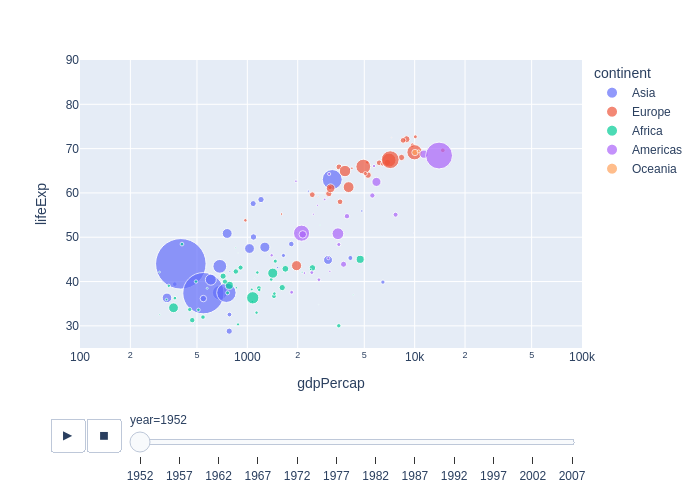

In [93]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

**Question 8**

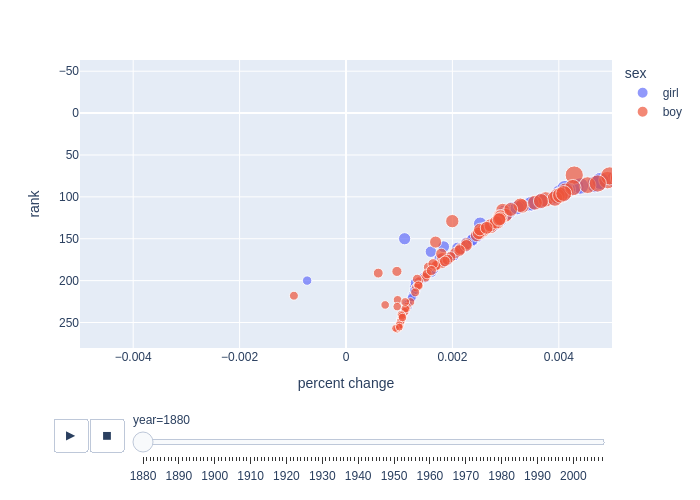

In [96]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name",size_max=50, range_x=[-0.005,0.005]) # range_y removed
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS